In [1]:
import json
# Standard library imports
import warnings

# Third-party imports for data manipulation and analysis
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Audio processing library
import librosa
import librosa.display

# Machine learning preprocessing and model selection
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler, minmax_scale
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Deep learning libraries
from keras.models import Sequential
from keras.layers import *
from keras import optimizers

# Statistical distributions for randomized search
from scipy.stats import loguniform, randint

In [2]:
with open("../config.json") as json_data_file:
    general_config = json.load(json_data_file)

dataset_path = general_config["GTZAN_Path_Alt"]
audio_path = dataset_path + "\\genres_original\\rock\\rock_00000.wav"
audio, sr = librosa.load(audio_path)
print(sr)

22050


## Waveplot

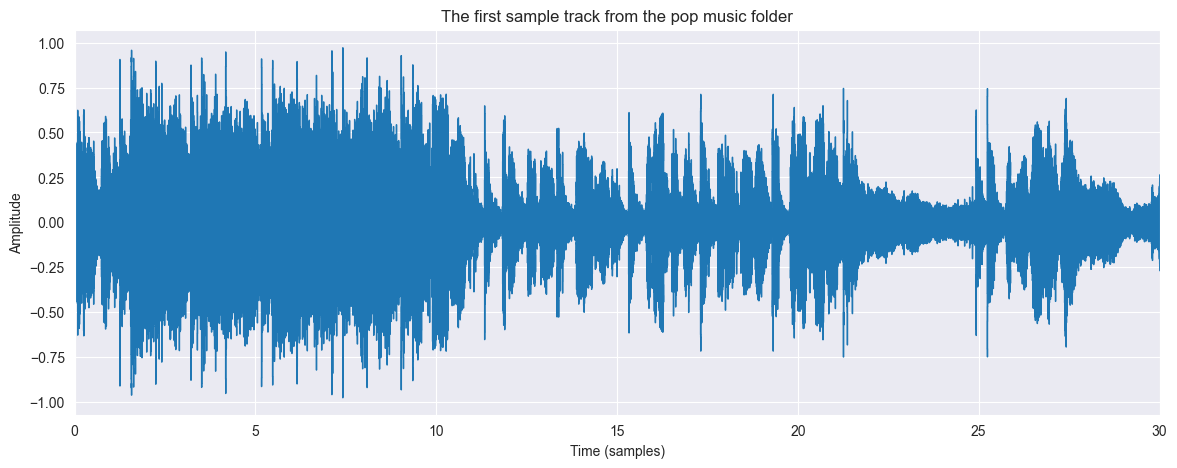

In [3]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y=audio, sr=sr)
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.title('The first sample track from the pop music folder')
plt.xlim([0,30])
plt.show()

## Chroma STFT

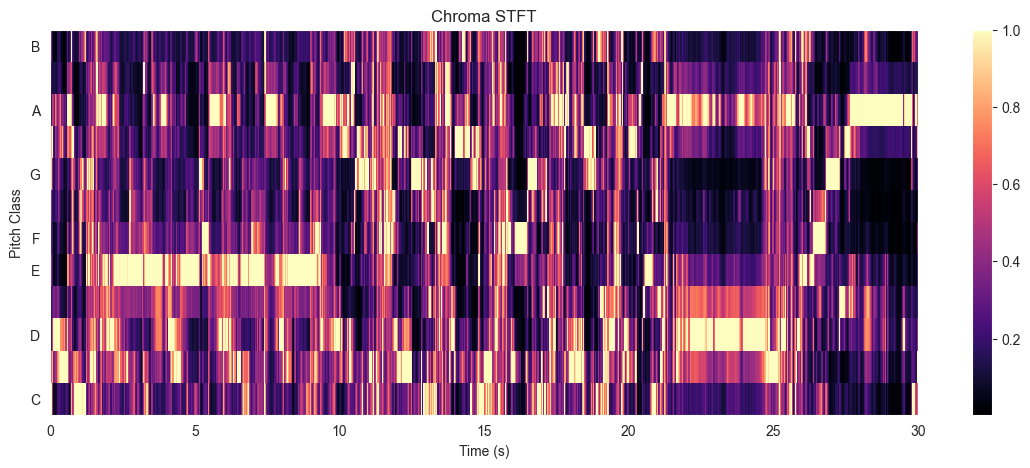

0.38743302
0.38743302
0.08594111


In [4]:
chroma_stft = librosa.feature.chroma_stft(y=audio, sr=sr)

plt.figure(figsize=(14, 5))
librosa.display.specshow(chroma_stft, x_axis='time', y_axis='chroma', sr=sr)
plt.colorbar()
plt.xlabel('Time (s)')
plt.ylabel('Pitch Class')
plt.title('Chroma STFT')
plt.show()

print(chroma_stft.mean())
print(np.mean(chroma_stft))
print(np.var(chroma_stft))

## RMS Mean

In [5]:
rms = librosa.feature.rms(y=audio)
rms_mean = rms.mean()

print("RMS Mean:", rms_mean)

RMS Mean: 0.12909234


## Spectral Centroids

In [6]:
# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return minmax_scale(x, axis=axis)

(1, 1293)
Spectral Centroid Mean: 1996.329188697747
Spectral Centroid Variance: 253392.62109674935


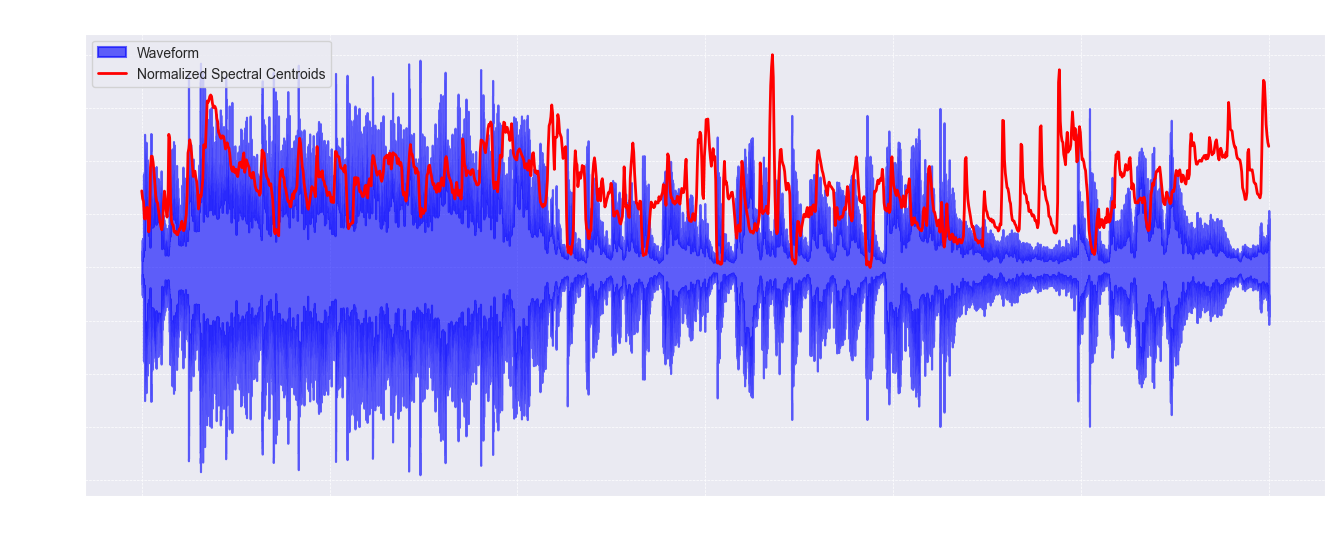

In [7]:
spectral_centroids = librosa.feature.spectral_centroid(y=audio, sr=sr)
spectral_centroids_mean = spectral_centroids.mean()

print(spectral_centroids.shape)
print("Spectral Centroid Mean:", spectral_centroids_mean)
print("Spectral Centroid Variance:", np.var(spectral_centroids))

# Computing the time variable for visualization
frames = range(len(spectral_centroids[0]))
t = librosa.frames_to_time(frames, sr=sr)

# Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(16, 6))
ax = plt.axes()

# Waveform plot
librosa.display.waveshow(audio, sr=sr, alpha=0.6, color='blue', linewidth=1.5, label='Waveform')

# Spectral centroids plot
plt.plot(t, normalize(spectral_centroids[0]), color='red', linewidth=2, label='Normalized Spectral Centroids')

# Enhancing the plot
plt.title('Waveform and Normalized Spectral Centroids', fontsize=16, fontweight='bold', color='white')
plt.xlabel('Time (seconds)', fontsize=14, color='white')
plt.ylabel('Normalized Amplitude / Frequency', fontsize=14, color='white')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Show the plot
plt.show()

## Spectral Bandwidth Values

Spectral Bandwidth Mean: 2097.039295804868


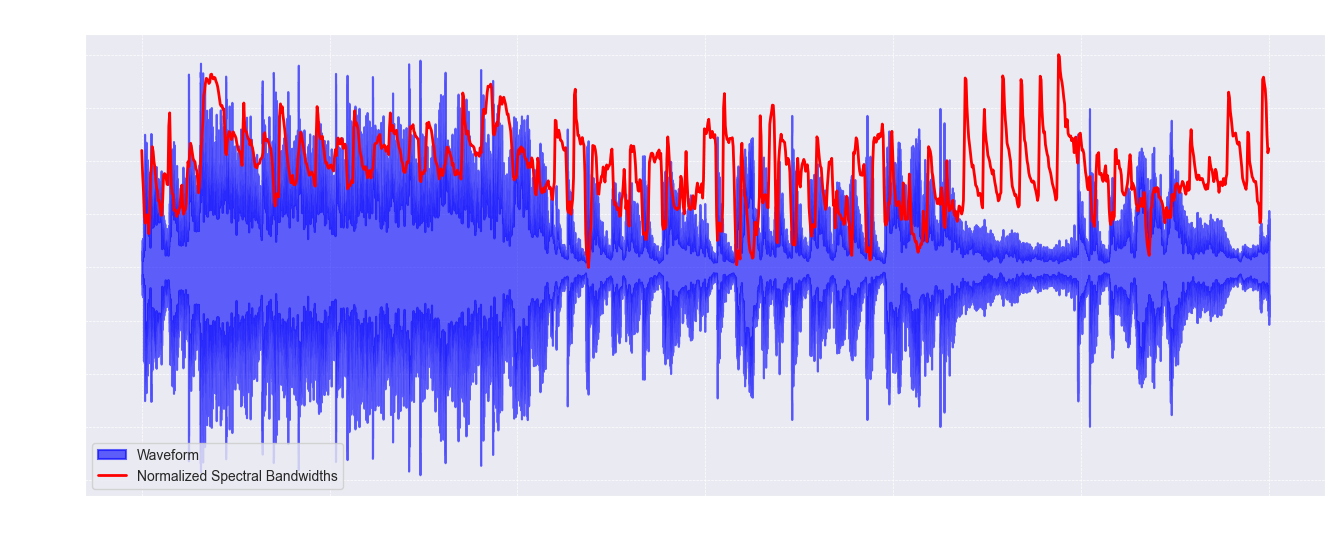

In [8]:
spectral_bandwidths = librosa.feature.spectral_bandwidth(y=audio, sr=sr)
spectral_bandwidths_mean = spectral_bandwidths.mean()

print("Spectral Bandwidth Mean:", spectral_bandwidths_mean)

# Computing the time variable for visualization
frames = range(len(spectral_bandwidths[0]))
t = librosa.frames_to_time(frames, sr=sr)

# Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(16, 6))
ax = plt.axes()

# Waveform plot
librosa.display.waveshow(audio, sr=sr, alpha=0.6, color='blue', linewidth=1.5, label='Waveform')

# Spectral centroids plot
plt.plot(t, normalize(spectral_bandwidths[0]), color='red', linewidth=2, label='Normalized Spectral Bandwidths')

# Enhancing the plot
plt.title('Waveform and Normalized Spectral Bandwidths', fontsize=16, fontweight='bold', color='white')
plt.xlabel('Time (seconds)', fontsize=14, color='white')
plt.ylabel('Normalized Amplitude / Frequency', fontsize=14, color='white')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Show the plot
plt.show()

## Spectral Rolloffs

Spectral Rolloff Mean: 4227.868737311485


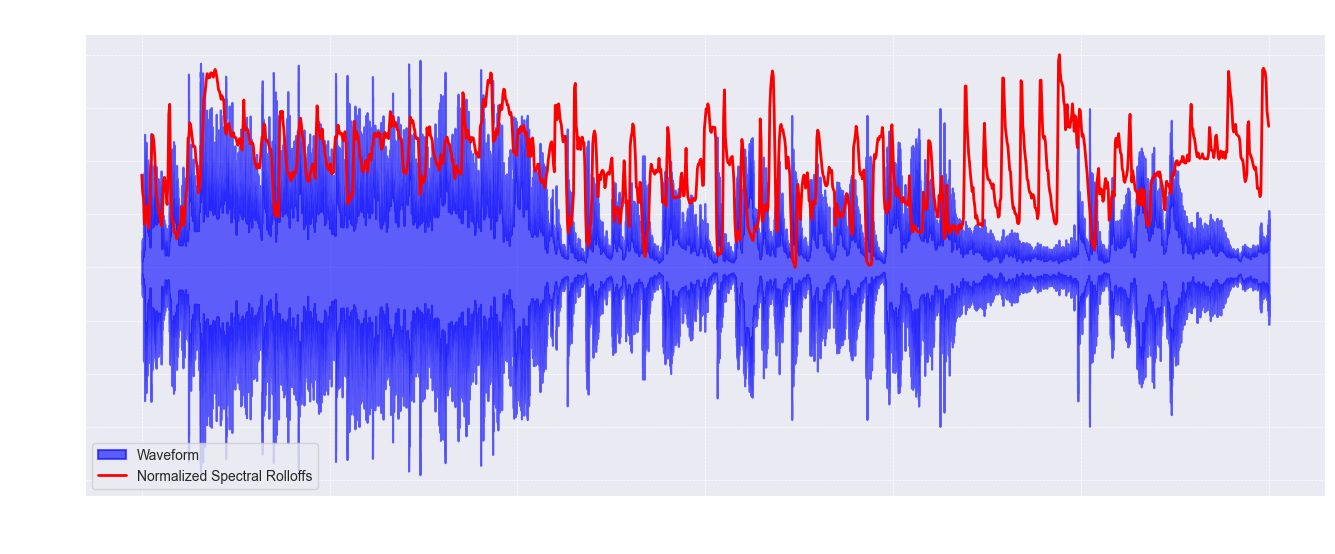

In [9]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=audio, sr=sr)
spectral_rolloff_mean = spectral_rolloff.mean()

print("Spectral Rolloff Mean:", spectral_rolloff_mean)

# Computing the time variable for visualization
frames = range(len(spectral_rolloff[0]))
t = librosa.frames_to_time(frames, sr=sr)

# Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(16, 6))
ax = plt.axes()

# Waveform plot
librosa.display.waveshow(audio, sr=sr, alpha=0.6, color='blue', linewidth=1.5, label='Waveform')

# Spectral centroids plot
plt.plot(t, normalize(spectral_rolloff[0]), color='red', linewidth=2, label='Normalized Spectral Rolloffs')

# Enhancing the plot
plt.title('Waveform and Normalized Spectral Rolloffs', fontsize=16, fontweight='bold', color='white')
plt.xlabel('Time (seconds)', fontsize=14, color='white')
plt.ylabel('Normalized Amplitude / Frequency', fontsize=14, color='white')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Show the plot
plt.show()

## Zero-Crossing Rates

Zero-Crossing Rate Mean: 0.09022025147428461


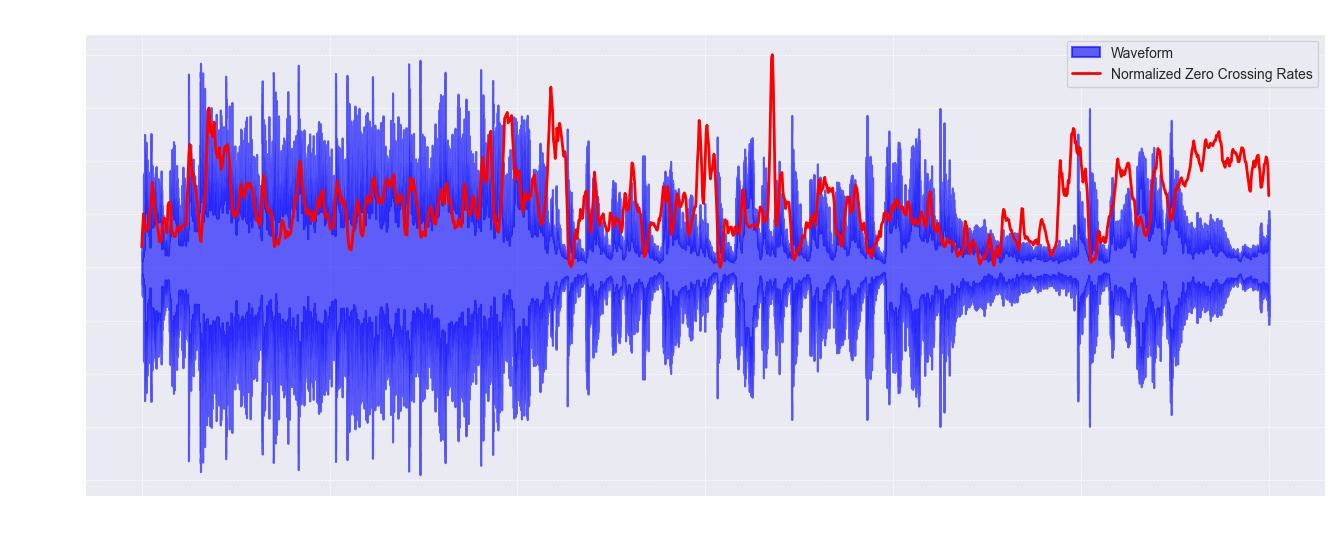

In [10]:
zero_crossing_rates = librosa.feature.zero_crossing_rate(y=audio)
zero_crossing_rates_mean = zero_crossing_rates.mean()

print("Zero-Crossing Rate Mean:", zero_crossing_rates_mean)

# Computing the time variable for visualization
frames = range(len(zero_crossing_rates[0]))
t = librosa.frames_to_time(frames, sr=sr)

# Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(16, 6))
ax = plt.axes()

# Waveform plot
librosa.display.waveshow(audio, sr=sr, alpha=0.6, color='blue', linewidth=1.5, label='Waveform')

# Spectral centroids plot
plt.plot(t, normalize(zero_crossing_rates[0]), color='red', linewidth=2, label='Normalized Zero Crossing Rates')

# Enhancing the plot
plt.title('Waveform and Normalized Zero Crossing Rates', fontsize=16, fontweight='bold', color='white')
plt.xlabel('Time (seconds)', fontsize=14, color='white')
plt.ylabel('Normalized Amplitude / Frequency', fontsize=14, color='white')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Show the plot
plt.show()

## Harmony

Harmony Mean: 0.23950204
Harmony Variance: 0.025972104


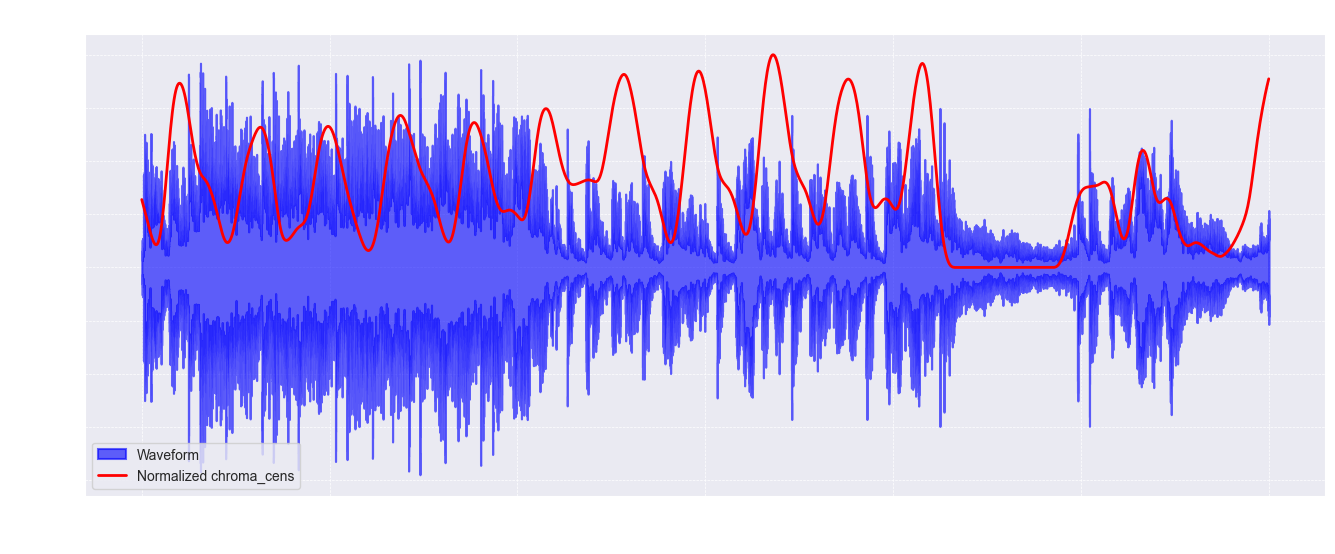

In [11]:
chroma_cens = librosa.feature.chroma_cens(y=audio, sr=sr)
harmony_mean = np.mean(chroma_cens)
harmony_var = np.var(chroma_cens)

print("Harmony Mean:", harmony_mean)
print("Harmony Variance:", harmony_var)

# Computing the time variable for visualization
frames = range(len(chroma_cens[0]))
t = librosa.frames_to_time(frames, sr=sr)

# Plotting the Spectral Centroid along the waveform
plt.figure(figsize=(16, 6))
ax = plt.axes()

# Waveform plot
librosa.display.waveshow(audio, sr=sr, alpha=0.6, color='blue', linewidth=1.5, label='Waveform')

# Spectral centroids plot
plt.plot(t, normalize(chroma_cens[0]), color='red', linewidth=2, label='Normalized chroma_cens')

# Enhancing the plot
plt.title('Waveform and Normalized chroma_cens', fontsize=16, fontweight='bold', color='white')
plt.xlabel('Time (seconds)', fontsize=14, color='white')
plt.ylabel('Normalized Amplitude / Frequency', fontsize=14, color='white')
plt.legend()
plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(fontsize=12, color='white')
plt.yticks(fontsize=12, color='white')

# Show the plot
plt.show()

## Tempo

In [12]:
tempo, _ = librosa.beat.beat_track(y=audio, sr=sr)
print("Tempo (BPM):", tempo)

Tempo (BPM): 123.046875


## MFCC

C:\Proiecte SSD\Licenta\Basic-Fourier-Usage\venv\lib\site-packages\sklearn\preprocessing\_data.py:261: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
C:\Proiecte SSD\Licenta\Basic-Fourier-Usage\venv\lib\site-packages\sklearn\preprocessing\_data.py:280: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


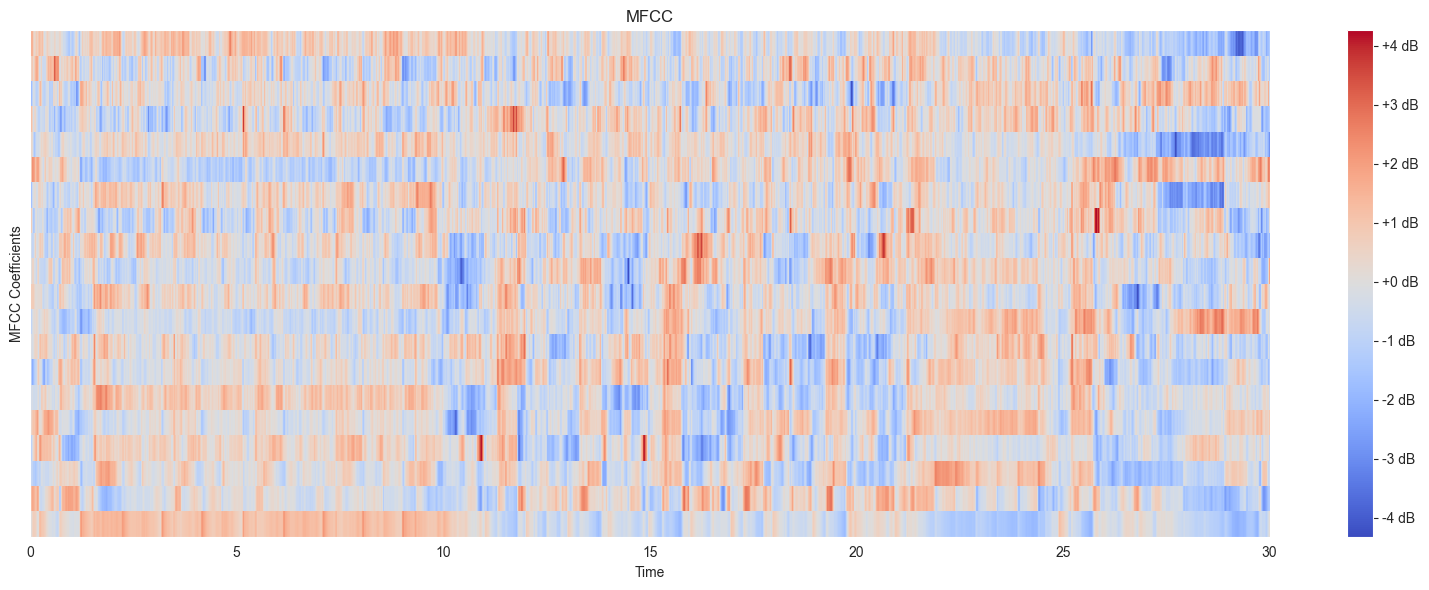

(20, 1293)
MFCC_1 Mean: 0.2261802
MFCC_1 Variance: 1.1560701
MFCC_2 Mean: 0.07493291
MFCC_2 Variance: 0.9386756
MFCC_3 Mean: -0.0056713643
MFCC_3 Variance: 0.99777186
MFCC_4 Mean: 0.14597762
MFCC_4 Variance: 1.0745367
MFCC_5 Mean: 0.06630685
MFCC_5 Variance: 0.9201878
MFCC_6 Mean: 0.1264335
MFCC_6 Variance: 0.7699227
MFCC_7 Mean: 0.22786203
MFCC_7 Variance: 0.6557808
MFCC_8 Mean: 0.23707524
MFCC_8 Variance: 0.8440752
MFCC_9 Mean: 0.27666792
MFCC_9 Variance: 0.7931454
MFCC_10 Mean: 0.27532893
MFCC_10 Variance: 0.5466733
MFCC_11 Mean: 0.19479625
MFCC_11 Variance: 0.5742116
MFCC_12 Mean: 0.29250512
MFCC_12 Variance: 0.5978487
MFCC_13 Mean: 0.26834166
MFCC_13 Variance: 0.3533431
MFCC_14 Mean: 0.11052849
MFCC_14 Variance: 0.47552308
MFCC_15 Mean: -0.08826886
MFCC_15 Variance: 0.62857425
MFCC_16 Mean: -0.08631546
MFCC_16 Variance: 0.8330947
MFCC_17 Mean: 0.06021353
MFCC_17 Variance: 0.6538352
MFCC_18 Mean: 0.065360434
MFCC_18 Variance: 0.66252214
MFCC_19 Mean: -0.021382201
MFCC_19 Variance: 

In [13]:
# Compute MFCCs
mfccs = librosa.feature.mfcc(y=audio, sr=sr)

# Apply Feature Scaling
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)

# Plot MFCCs
plt.figure(figsize=(16, 6))
librosa.display.specshow(mfccs, x_axis='time', cmap='coolwarm')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC')
plt.xlabel('Time')
plt.ylabel('MFCC Coefficients')
plt.tight_layout()
plt.show()


print(mfccs.shape)

for i,mfcc_column in zip(range(20), mfccs.T):
    print("MFCC_" + str(i+1) + " Mean:",np.mean(mfcc_column))
    print("MFCC_" + str(i+1) + " Variance:",np.var(mfcc_column))

#### Loading Data

In [14]:
df = pd.read_csv(dataset_path + "\\features_3_sec.csv")
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [15]:
df.shape

(9990, 60)

In [16]:
df.drop('filename', axis=1)
df.shape

(9990, 60)

## Feature Corelation

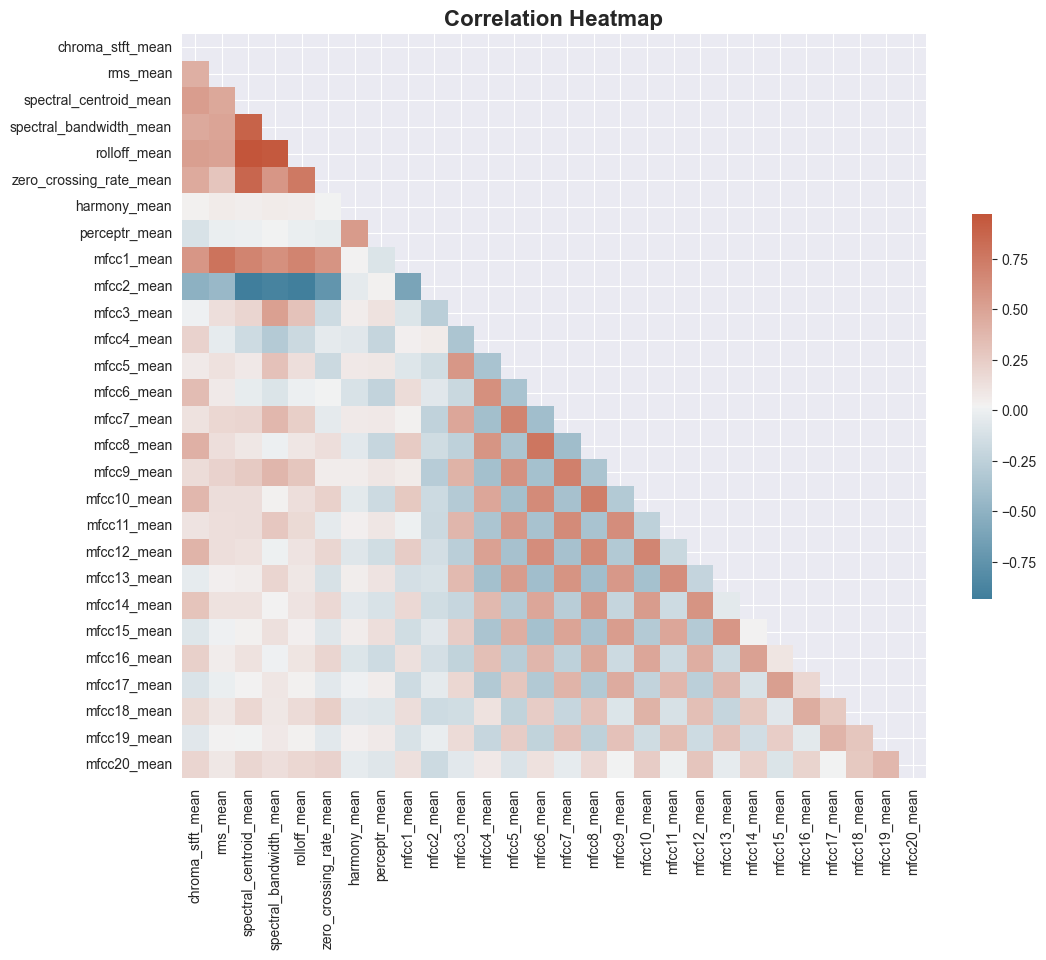

In [17]:
mean_columns = df.filter(regex='_mean$')

correlation_matrix = mean_columns.corr()

# Create a boolean mask for the upper triangle of the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, annot=False, linewidths=0,
            cbar_kws={"shrink": .5}, square=True)

# Add a title to the heatmap
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')

# Show the plot
plt.show()

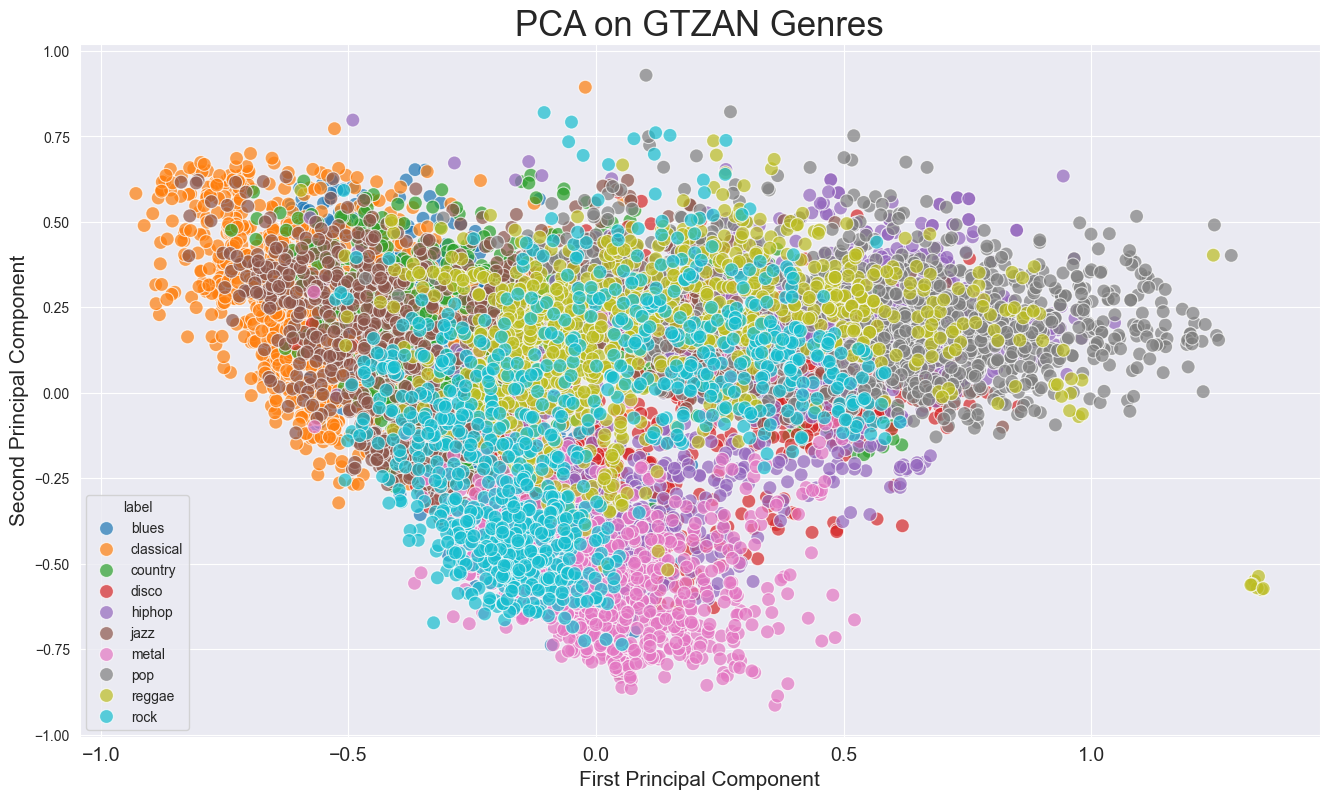

In [18]:
data = df.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']


#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

# 44.93 variance explained

plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on GTZAN Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("First Principal Component", fontsize = 15)
plt.ylabel("Second Principal Component", fontsize = 15)
plt.savefig("PCA Scattert.jpg")